In [ ]:
# Kernel Support Vector Machine


#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import seaborn as sns
import os
#2 Importing the dataset
dataset = pd.read_csv('/home/inlab/Downloads/data extraction_0123_v1.xlsx - Sheet2.csv')
X = dataset.iloc[:, [0, 4]].values
y = dataset.iloc[:, 5].values

#3 Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#4 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#5 Fitting Kernel SVM classifier to the Training set
# Create your classifier object here
from sklearn.svm import SVC 
#Lets choose Gaussian kernel 
classifier = SVC(kernel='rbf', random_state=0 )
classifier.fit(X_train, y_train)

#6 Predicting the Test set results
y_pred = classifier.predict(X_test)

#7 Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print (accuracy_score(y_test, y_pred))
#8 Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM Classifier (Training set)')
plt.xlabel('Number of Peers')
plt.ylabel('Average Delay')
plt.legend()
plt.show()

#9 Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM Classifier (Test set)')
plt.xlabel('Number of Peers')
plt.ylabel('Average Delay')
plt.legend()
plt.show()

In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler()
dataset = pd.read_csv('/home/inlab/Downloads/data extraction_0125_v1.csv')
X = dataset.iloc[:, [3, 4]].values
y = dataset.iloc[:, 5].values
print("Shape of X:"+str(X.shape))
print("Shape of y:"+str(y.shape))
X = scaler.fit_transform(X)

Shape of X:(176, 2)
Shape of y:(176,)


In [2]:
from matplotlib.colors import ListedColormap
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

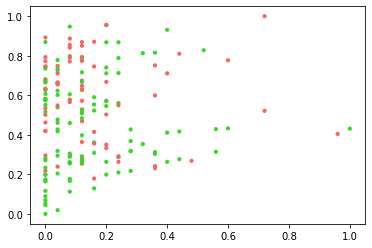

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()

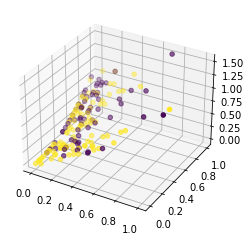

In [5]:
# adding a new dimension to X 
import numpy as np
import matplotlib.pyplot as plt
X1 = X[:, 0].reshape((-1, 1)) 
X2 = X[:, 1].reshape((-1, 1)) 
X3 = (X1**2 + X2**2) 
#X3 = X[:, 2].reshape((-1, 1)) 
X = np.hstack((X, X3)) 

# visualizing data in higher dimension 
fig = plt.figure() 
axes = fig.add_subplot(111, projection = '3d')
axes.scatter(X1, X2, X3, c = y, depthshade = True) 
#axes.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True) 
plt.show() 


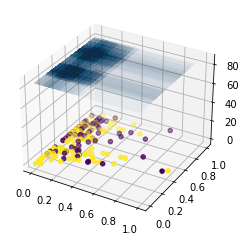

In [6]:
# create support vector classifier using a linear kernel 
from sklearn import svm 

svc = svm.SVC(kernel = 'linear') 
svc.fit(X, y) 
w = svc.coef_ 
b = svc.intercept_ 

# plotting the separating hyperplane 
x1 = X[:, 0].reshape((-1, 1)) 
x2 = X[:, 1].reshape((-1, 1)) 
x1, x2 = np.meshgrid(x1, x2) 
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2] 

fig = plt.figure() 
axes2 = fig.add_subplot(111, projection = '3d') 
axes2.scatter(X1, X2, X1**2 + X2**2, c = y, depthshade = True) 
axes1 = fig.gca(projection = '3d') 
axes1.plot_surface(x1, x2, x3, alpha = 0.01) 
plt.show() 
